In [1]:
# Import the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
# Make the synthetic data
series = np.sin((0.1*np.arange(10000))**2)

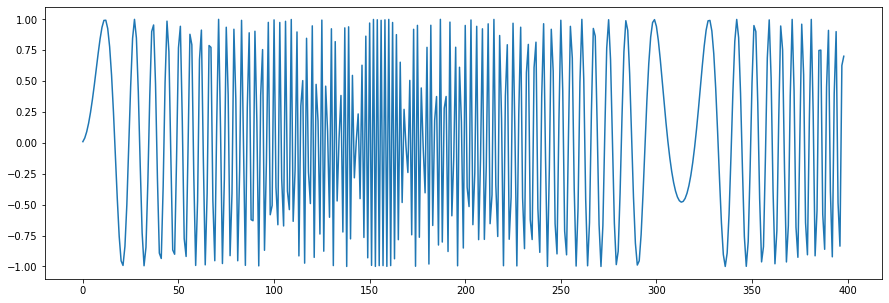

In [3]:
# Plot the series (first 400 points)
plt.figure(figsize=(15,5))
plt.plot(series[1:400])
plt.show();

In [4]:
# Build the dataset
T = 200
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T] # Get the set of T values
    X.append(x) # append those values into the dataset X
    y = series[t+T] # get the next value as the target
    Y.append(y) # add the target value to Y

In [5]:
# Make the arrays the correct shape (N x T x D)
X_arr = np.array(X).reshape(-1, T) # Now the data should be N x T
y_arr = np.array(Y)
N = len(X_arr)
print('X_arr shape:', X_arr.shape)
print('y_arr shape:', y_arr.shape)

X_arr shape: (9800, 200)
y_arr shape: (9800,)


In [6]:
# Split into train and test sets
# Don't use train_test_split
# Model needs to make predictions, to train set is the first half, and test set is the second half
# Can use points in between the train set for the test set
X_train = X_arr[:-N//2]
y_train = y_arr[:-N//2]
X_test = X_arr[-N//2:]
y_test = y_arr[-N//2:]

### Try an autoregressive linear model

In [7]:
# Define the layers of the model
i = Input(shape=(T,))
x = Dense(1)(i)

# Build the model
model = Model(i, x)

# Define how the model should be trained
model.compile(optimizer=Adam(lr=0.001),
              loss='mse')

# Train the mdoel
result = model.fit(x=X_train, y=y_train, # train on the first half of the dataset (don't use train_test_split)
                   epochs=25,
                   validation_data=(X_test, y_test)) # test on the second half of the dataset 

Train on 4900 samples, validate on 4900 samples
Epoch 1/25
4900/4900 [==============================] - 1s 223us/sample - loss: 1.1285 - val_loss: 0.8416
Epoch 2/25
4900/4900 [==============================] - 0s 96us/sample - loss: 0.7094 - val_loss: 0.6055
Epoch 3/25
4900/4900 [==============================] - 0s 97us/sample - loss: 0.5656 - val_loss: 0.5304
Epoch 4/25
4900/4900 [==============================] - 0s 96us/sample - loss: 0.5219 - val_loss: 0.5106
Epoch 5/25
4900/4900 [==============================] - 0s 97us/sample - loss: 0.5095 - val_loss: 0.5056
Epoch 6/25
4900/4900 [==============================] - 0s 96us/sample - loss: 0.5070 - val_loss: 0.5045
Epoch 7/25
4900/4900 [==============================] - 0s 97us/sample - loss: 0.5072 - val_loss: 0.5044
Epoch 8/25
4900/4900 [==============================] - 0s 101us/sample - loss: 0.5069 - val_loss: 0.5048
Epoch 9/25
4900/4900 [==============================] - 0s 99us/sample - loss: 0.5067 - val_loss: 0.5047
Epoch

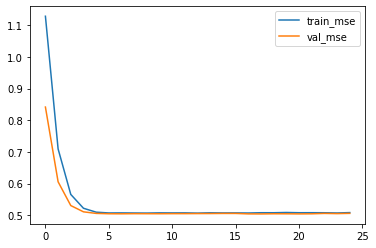

In [8]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['loss'], label='train_mse');
plt.plot(result.history['val_loss'], label='val_mse');
plt.legend();

Try to make a forecast

In [9]:
# create the lists
validation_target = y_test[-T:]
data_for_next_prediction = X_test[-T]
validation_predictions = []

# start index at 0
i = 0

# make predictions
while len(validation_predictions) < len(validation_target):
    # Make prediction using available data (including predicted data)
    prediction = model.predict(data_for_next_prediction.reshape(1,-1))[0,0] # need to reshape for to get it into the right format
    
    # Use the last 10 data points for the next prediction
    data_for_next_prediction = np.roll(data_for_next_prediction, -1)
    data_for_next_prediction[-1] = prediction
    
    # Add prediction to set of predictions
    validation_predictions.append(prediction)

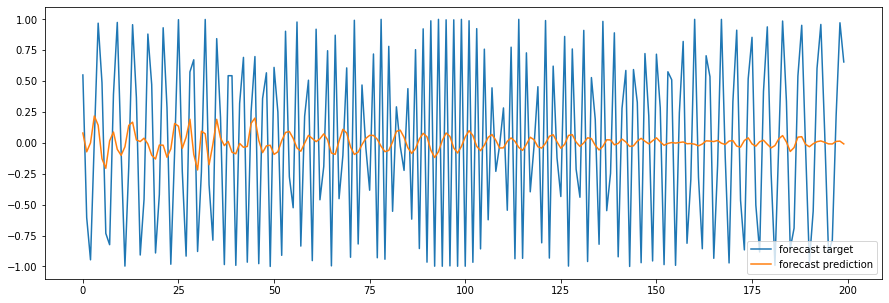

In [10]:
# plot predicted vs actual test data
plt.figure(figsize=(15,5))
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();

That's terrible

### Try a SimpleRNN

In [11]:
# Reshape the data
X_arr = X_arr.reshape(-1, T, 1)

# Split into train and test sets
X_train = X_arr[:-N//2]
X_test = X_arr[-N//2:]

In [12]:
# Define the layers of the model
i = Input(shape=(T, D))
x = SimpleRNN(20)(i) # Defailt activation is activation='tanh'
x = Dense(1)(x)

# Build the model
model = Model(i, x)

# Define how the model should be trained
model.compile(optimizer=Adam(lr=0.001),
              loss='mse')

# Train the mdoel
result = model.fit(x=X_train, y=y_train, # train on the first half of the dataset (don't use train_test_split)
                   epochs=25,
                   validation_data=(X_test, y_test)) # test on the second half of the dataset 

Train on 4900 samples, validate on 4900 samples
Epoch 1/25
4900/4900 [==============================] - 14s 3ms/sample - loss: 0.4273 - val_loss: 0.3072
Epoch 2/25
4900/4900 [==============================] - 13s 3ms/sample - loss: 0.2344 - val_loss: 0.1489
Epoch 3/25
4900/4900 [==============================] - 13s 3ms/sample - loss: 0.0988 - val_loss: 0.0693
Epoch 4/25
4900/4900 [==============================] - 14s 3ms/sample - loss: 0.0491 - val_loss: 0.0476
Epoch 5/25
4900/4900 [==============================] - 14s 3ms/sample - loss: 0.0344 - val_loss: 0.0370
Epoch 6/25
4900/4900 [==============================] - 15s 3ms/sample - loss: 0.0278 - val_loss: 0.0323
Epoch 7/25
4900/4900 [==============================] - 13s 3ms/sample - loss: 0.0232 - val_loss: 0.0284
Epoch 8/25
4900/4900 [==============================] - 13s 3ms/sample - loss: 0.0204 - val_loss: 0.0277
Epoch 9/25
4900/4900 [==============================] - 12s 3ms/sample - loss: 0.0182 - val_loss: 0.0233
Epoch 1

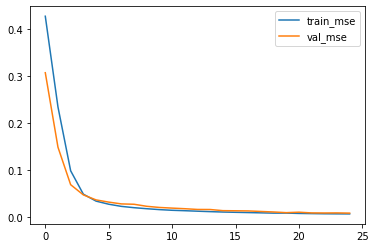

In [13]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['loss'], label='train_mse');
plt.plot(result.history['val_loss'], label='val_mse');
plt.legend();

Try to make a forecast

In [14]:
# create the lists
validation_target = y_test[-T:]
data_for_next_prediction = X_test[-T]
validation_predictions = []

# start index at 0
i = 0

# make predictions
while len(validation_predictions) < len(validation_target):
    # Make prediction using available data (including predicted data)
    prediction = model.predict(data_for_next_prediction.reshape(1,-1, 1))[0,0] # need to reshape for to get it into the right format
    
    # Use the last 10 data points for the next prediction
    data_for_next_prediction = np.roll(data_for_next_prediction, -1)
    data_for_next_prediction[-1] = prediction
    
    # Add prediction to set of predictions
    validation_predictions.append(prediction)

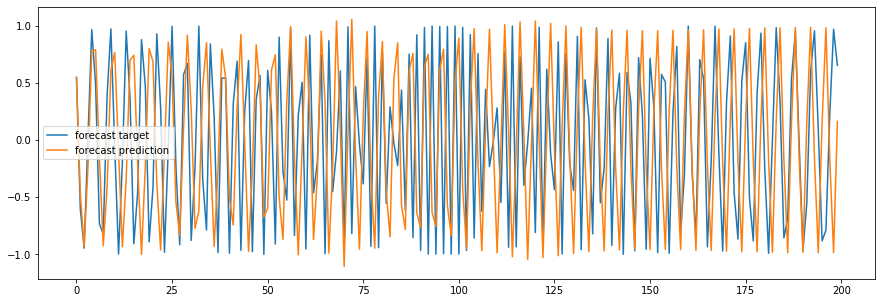

In [15]:
# plot predicted vs actual test data
plt.figure(figsize=(15,5))
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();

It looks like it does better. The frequency looks right in the beginning, but doesn't look so good after that (it doesn't know in the second half that the frequency slows down)

### Try an LSTM

In [16]:
# Define the layers of the model
i = Input(shape=(T, D))
x = LSTM(20)(i) # Defailt activation is activation='tanh'
x = Dense(1)(x)

# Build the model
model = Model(i, x)

# Define how the model should be trained
model.compile(optimizer=Adam(lr=0.001),
              loss='mse')

# Train the mdoel
result = model.fit(x=X_train, y=y_train, # train on the first half of the dataset (don't use train_test_split)
                   epochs=25,
                   validation_data=(X_test, y_test)) # test on the second half of the dataset 

Train on 4900 samples, validate on 4900 samples
Epoch 1/25
4900/4900 [==============================] - 4s 829us/sample - loss: 0.4997 - val_loss: 0.4877
Epoch 2/25
4900/4900 [==============================] - 2s 374us/sample - loss: 0.4505 - val_loss: 0.3512
Epoch 3/25
4900/4900 [==============================] - 2s 385us/sample - loss: 0.2164 - val_loss: 0.1142
Epoch 4/25
4900/4900 [==============================] - 2s 375us/sample - loss: 0.0475 - val_loss: 0.0607
Epoch 5/25
4900/4900 [==============================] - 2s 363us/sample - loss: 0.0193 - val_loss: 0.0501
Epoch 6/25
4900/4900 [==============================] - 2s 369us/sample - loss: 0.0130 - val_loss: 0.0384
Epoch 7/25
4900/4900 [==============================] - 2s 362us/sample - loss: 0.0102 - val_loss: 0.0292
Epoch 8/25
4900/4900 [==============================] - 2s 361us/sample - loss: 0.0085 - val_loss: 0.0163
Epoch 9/25
4900/4900 [==============================] - 2s 358us/sample - loss: 0.0071 - val_loss: 0.021

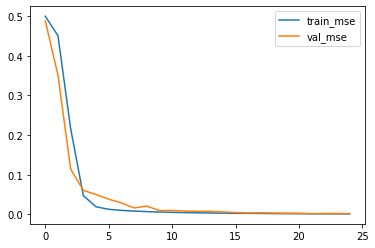

In [17]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['loss'], label='train_mse');
plt.plot(result.history['val_loss'], label='val_mse');
plt.legend();

Try to make a forecast

In [18]:
# create the lists
validation_target = y_test[-T:]
data_for_next_prediction = X_test[-T]
validation_predictions = []

# start index at 0
i = 0

# make predictions
while len(validation_predictions) < len(validation_target):
    # Make prediction using available data (including predicted data)
    prediction = model.predict(data_for_next_prediction.reshape(1,-1, 1))[0,0] # need to reshape for to get it into the right format
    
    # Use the last 10 data points for the next prediction
    data_for_next_prediction = np.roll(data_for_next_prediction, -1)
    data_for_next_prediction[-1] = prediction
    
    # Add prediction to set of predictions
    validation_predictions.append(prediction)

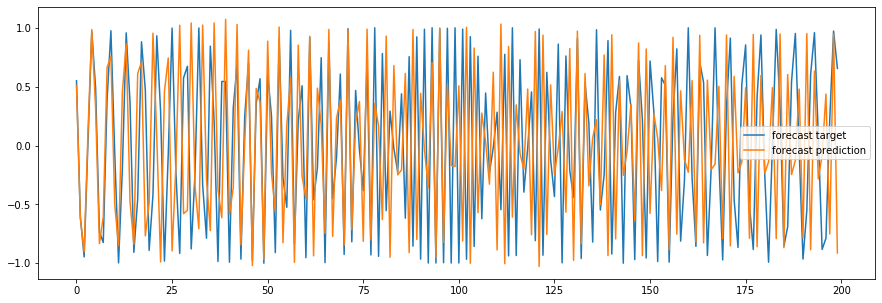

In [19]:
# plot predicted vs actual test data
plt.figure(figsize=(15,5))
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();

The LSTM is much better at 'remembering' a longer-term pattern than the SimpleRNN

### Try a GRU

In [20]:
# Define the layers of the model
i = Input(shape=(T, D))
x = GRU(20)(i) # Defailt activation is activation='tanh'
x = Dense(1)(x)

# Build the model
model = Model(i, x)

# Define how the model should be trained
model.compile(optimizer=Adam(lr=0.001),
              loss='mse')

# Train the mdoel
result = model.fit(x=X_train, y=y_train, # train on the first half of the dataset (don't use train_test_split)
                   epochs=25,
                   validation_data=(X_test, y_test)) # test on the second half of the dataset 

Train on 4900 samples, validate on 4900 samples
Epoch 1/25
4900/4900 [==============================] - 3s 651us/sample - loss: 0.5018 - val_loss: 0.4923
Epoch 2/25
4900/4900 [==============================] - 2s 345us/sample - loss: 0.5010 - val_loss: 0.4921
Epoch 3/25
4900/4900 [==============================] - 2s 362us/sample - loss: 0.4997 - val_loss: 0.4935
Epoch 4/25
4900/4900 [==============================] - 2s 360us/sample - loss: 0.4590 - val_loss: 0.3077
Epoch 5/25
4900/4900 [==============================] - 2s 372us/sample - loss: 0.1291 - val_loss: 0.0317
Epoch 6/25
4900/4900 [==============================] - 2s 348us/sample - loss: 0.0190 - val_loss: 0.0119
Epoch 7/25
4900/4900 [==============================] - 2s 347us/sample - loss: 0.0094 - val_loss: 0.0082
Epoch 8/25
4900/4900 [==============================] - 2s 359us/sample - loss: 0.0064 - val_loss: 0.0055
Epoch 9/25
4900/4900 [==============================] - 2s 338us/sample - loss: 0.0048 - val_loss: 0.004

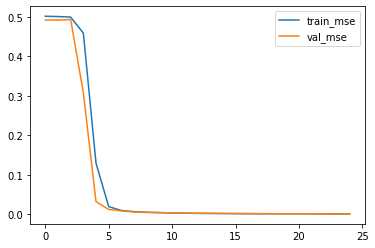

In [21]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['loss'], label='train_mse');
plt.plot(result.history['val_loss'], label='val_mse');
plt.legend();

In [22]:
# create the lists
validation_target = y_test[-T:]
data_for_next_prediction = X_test[-T]
validation_predictions = []

# start index at 0
i = 0

# make predictions
while len(validation_predictions) < len(validation_target):
    # Make prediction using available data (including predicted data)
    prediction = model.predict(data_for_next_prediction.reshape(1,-1, 1))[0,0] # need to reshape for to get it into the right format
    
    # Use the last 10 data points for the next prediction
    data_for_next_prediction = np.roll(data_for_next_prediction, -1)
    data_for_next_prediction[-1] = prediction
    
    # Add prediction to set of predictions
    validation_predictions.append(prediction)

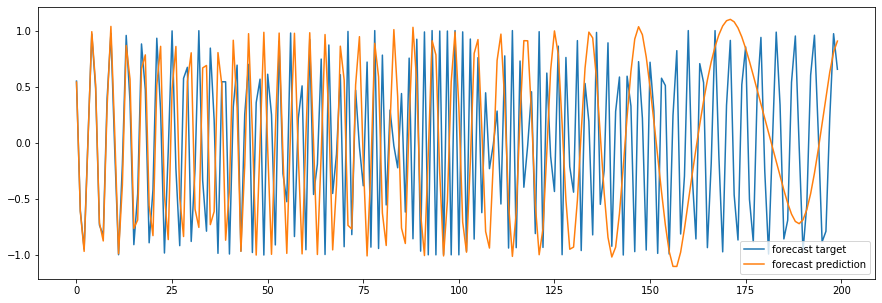

In [23]:
# plot predicted vs actual test data
plt.figure(figsize=(15,5))
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();

### Try LSTM using all the hidden states

In [32]:
from tensorflow.keras.layers import GlobalMaxPool1D

# Define the layers of the model
i = Input(shape=(T, D))
x = LSTM(20, return_sequences=True)(i) # Returns T x M instead of M, so need global max ppoling to return M
x = GlobalMaxPool1D()(x)
x = Dense(1)(x)

# Build the model
model = Model(i, x)

# Define how the model should be trained
model.compile(optimizer=Adam(lr=0.01),
              loss='mse')

# Train the mdoel
result = model.fit(x=X_train, y=y_train, # train on the first half of the dataset (don't use train_test_split)
                   epochs=25,
                   validation_data=(X_test, y_test)) # test on the second half of the dataset 

Train on 4900 samples, validate on 4900 samples
Epoch 1/25
4900/4900 [==============================] - 3s 573us/sample - loss: 0.5042 - val_loss: 0.4934
Epoch 2/25
4900/4900 [==============================] - 2s 320us/sample - loss: 0.5023 - val_loss: 0.4924
Epoch 3/25
4900/4900 [==============================] - 2s 317us/sample - loss: 0.5032 - val_loss: 0.4986
Epoch 4/25
4900/4900 [==============================] - 2s 329us/sample - loss: 0.5022 - val_loss: 0.4927
Epoch 5/25
4900/4900 [==============================] - 2s 323us/sample - loss: 0.5021 - val_loss: 0.4925
Epoch 6/25
4900/4900 [==============================] - 2s 335us/sample - loss: 0.5008 - val_loss: 0.5050
Epoch 7/25
4900/4900 [==============================] - 2s 339us/sample - loss: 0.5025 - val_loss: 0.4931
Epoch 8/25
4900/4900 [==============================] - 2s 328us/sample - loss: 0.5009 - val_loss: 0.4959
Epoch 9/25
4900/4900 [==============================] - 2s 331us/sample - loss: 0.5013 - val_loss: 0.495

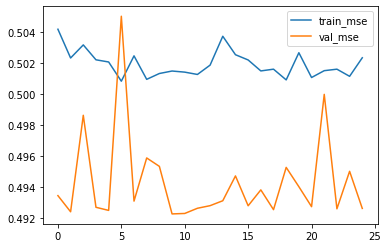

In [33]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['loss'], label='train_mse');
plt.plot(result.history['val_loss'], label='val_mse');
plt.legend();

In [34]:
# create the lists
validation_target = y_test[-T:]
data_for_next_prediction = X_test[-T]
validation_predictions = []

# start index at 0
i = 0

# make predictions
while len(validation_predictions) < len(validation_target):
    # Make prediction using available data (including predicted data)
    prediction = model.predict(data_for_next_prediction.reshape(1,-1, 1))[0,0] # need to reshape for to get it into the right format
    
    # Use the last 10 data points for the next prediction
    data_for_next_prediction = np.roll(data_for_next_prediction, -1)
    data_for_next_prediction[-1] = prediction
    
    # Add prediction to set of predictions
    validation_predictions.append(prediction)

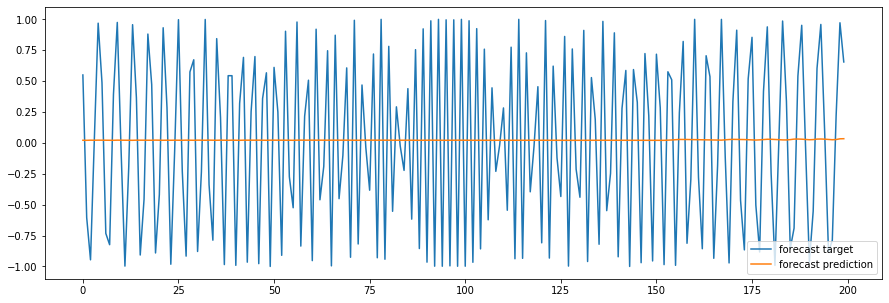

In [35]:
# plot predicted vs actual test data
plt.figure(figsize=(15,5))
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();

This fails miserably for some reason